# **TRABAJO FINAL DATA SCIENCE - JAVIER ARAMAYO
# **"PREVENCION DE MUERTE EN ENFERMEDAD DE CORAZON"**

# ABSTRACT / RESUMEN

# 1- Definicion de Objetivo


**.1 - Definición de objetivo:** 
La insuficiencia cardíaca es una de las enfermedades principales y desencadenantes de enfermedades cardiovasculares aun más graves a nivel mundial
¿Existe la posibilidad de predecir con anticipación la muerte de un paciente cuando tiene varias variables o análisis médicos fuera del rango normal?


# 2- Contexto Comercial

**.2- Contexto Comercial:** 
La insuficiencia cardíaca es un problema de salud que afecta a millones de personas a nivel mundial. Además, desencadena en otros problemas cardiovasculares.
Es de mucho interés para el ámbito médico y de salud publica/privada, poder predecir en la medida de lo posible, el desencadenante fatal de un paciente o no, para poder actuar preventivamente sobre cada caso.
 Existen muchas variables o condiciones de un paciente que agravan este problema de salud. Como asi también existen distintos análisis médicos que ayudan a detectar un problema. Debido a esto, se van a relacionar distintos análisis médicos y condiciones.

# 3- Problema Comercial / Preguntas

**.3- Problema Comercial:** 
Con los datos recolectados de una clinica medica de Houston en EEUU, se busca cruzar distintas variables y resultados de análisis médicos, para determinar el grado de precisión de las tendencias que puedan surgir y dar respuesta a las siguientes preguntas:


*  ¿Que grado de relación con el deceso existe  cuando el paciente tiene alguna condición clínica, como presentar Anemia, Diabetes o ser Hipertenso?.

*  ¿Que tendencia existe a la muerte del paciente, cuando hay valores fuera de rango en análisis clínicos, como Nivel de enzima CPK, Fracción de eyección de sangre, Nivel de plaquetas, nivel de creatinina y nivel de sodio en sangre?.

*  ¿Hay relacion de esta enfermedad con la edad o el sexo del paciente?.

*  ¿Hay alguna combinación de variables o análisis médicos mencionados que incrementen esa tendencia?

# 4- Contexto Analitico - Data Adquisition

Los datos recolectados pertenecen a una clinica medica de salud ubicada en HOuston, en Estados Unidos. Las variables/condiciones y analisis medicos a analizar, junto con sus valores normales (tolerancia normal), son los siguientes:


*   Edad - medida en años.
*   Anemia - paciente con anemia =1 / sin anemia =0.
*   Nivel enzima CPK en sangre - (mcg/L)- Valor normal 49-345 mcg/L en Hombres y 38-205 mcg/L en Mujeres.
*   Paciente con Diabetes =1 / sin diabetes =0.
*   Fracción de eyección de sangre del corazón- % - Normal 55% - 65%.
*   Paciente Hipertenso =1 / no hipertenso=0.
*   Nivel Plaquetas en sangre (mcL) - Normal 150.000 - 400.000 mcL.
*   Nivel Creatinina en suero (mg/dL) - Normal - 0,7 - 1,3 mg/L.
*   Nivel de sodio en sangre - (mEq/L) - Normal - 35 - 145 mEq/L.
*   Hombre=1 / Mujer=0.


**DATA ADQUISITION - Adquisicion de datos- FUENTE EXTERNA**. Previo a la extraccion de datos propiamente dicha, se busca en google el grado de importancia que tiene este tema en la poblacion. Para ello se veran las tendencias de busqueda de la poblacion respecto a este problema de salud. Se realiza una descarga de detos de una APIs publica.

**¿Alguna vez nos damos cuenta del grado de importancia que tienen las enfermedades cardiovasculares en la sociedad? 
¿Que tan importante es este tema para la poblacion?*
Veamos las tendencias de busquedas en google de la poblacion en general acerca de estos temas relacionados, como son: enfermedades cardiovasculares, arritmias, paro cardiaco, insuficiencia cardiaca.**

**DESCARGA APIs Publica** - 
A CONTINUACION mostraremos las tendencias de busqueda en google Trends de palabras relacionadas a nuestro tema de enfermedades cardiovasculares.

In [ ]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16127 sha256=5b35ab5b49653ff0e41677a1a5e4066042d86b509b745f0f601a9ec800644279
  Stored in directory: /root/.cache/pip/wheels/e8/78/c8/18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends


In [ ]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq()
keywords = ["enfermedades cardiovasculares", "arritmias", "paro cardiaco", "insuficiencia cardiaca"] #elegimos palabras claves que se usan para buscar informacion en google.
pytrends.build_payload(keywords, cat=0, geo='', gprop='')
stop_queries = pytrends.interest_over_time()[keywords]
stop_queries.tail()

enfermedades cardiovasculares  arritmias  paro cardiaco  \
date                                                                  
2022-11-06                             22         39             29   
2022-11-13                             20         31             29   
2022-11-20                             17         33             29   
2022-11-27                             18         31             31   
2022-12-04                             15         28             29   

            insuficiencia cardiaca  
date                                
2022-11-06                      84  
2022-11-13                      85  
2022-11-20                      80  
2022-11-27                      78  
2022-12-04                      72

In [ ]:
stop_queries.shape

(260, 4)

Esto muestra que las tendencias de busqueda en Google son elevadas, y los datos brindados son acumulados por semana, en las ultimas 260 semanas, (seria desde octubre 2017 hasta fines de setiembre de 2022.

In [ ]:
stop_queries.sum()

enfermedades cardiovasculares     3896
arritmias                         7647
paro cardiaco                     6557
insuficiencia cardiaca           18206
dtype: int64

In [ ]:
# Haremos un grafico para mostrar estas tendencias y cuantificarlas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [ ]:
stop_queries.mean()

enfermedades cardiovasculares    14.984615
arritmias                        29.411538
paro cardiaco                    25.219231
insuficiencia cardiaca           70.023077
dtype: float64

In [ ]:
stop_queries.head()

enfermedades cardiovasculares  arritmias  paro cardiaco  \
date                                                                  
2017-12-17                              7         21             16   
2017-12-24                              2         19             15   
2017-12-31                              5         15             19   
2018-01-07                              9         18             19   
2018-01-14                              7         22             18   

            insuficiencia cardiaca  
date                                
2017-12-17                      56  
2017-12-24                      38  
2017-12-31                      45  
2018-01-07                      57  
2018-01-14                      54

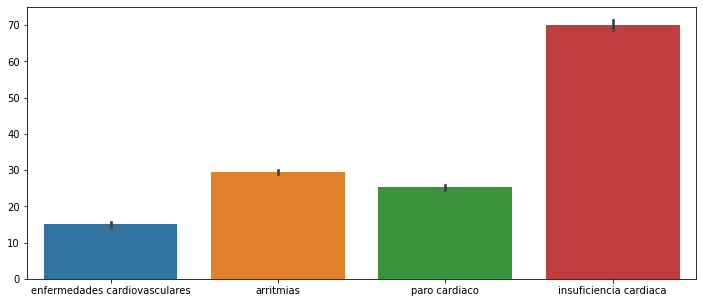

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(data= stop_queries)

En los ultimos 5 años, como se ve en el grafico, el promedio por semana de busquedas en google de palabras claves relacionas a nuestro tema, representa valores considerables, mostrando el interes que tiene la poblacion en este tema.

Como se puede ver, hay muchas busquedas en el google acerca de esos temas.

**Debido a eso, a los resultados obtenidos de las busquedas en google, es muy importante para la poblacion conocer el grado de incidencia que tienen distintas variables clinicas y condiciones medicas, en un desencadenante fatal para una persona**.

Respondamos a las siguientes preguntas enunciadas en la Etapa 3 ("Problema Comercial").
**Pregunta 1**-
¿Que grado de relación con el deceso existe cuando el paciente tiene alguna condición clínica, como presentar Anemia, Diabetes o ser Hipertenso?./
**Pregunta 2**
-¿Que tendencia existe a la muerte del paciente, cuando hay valores fuera de rango en análisis clínicos, como Nivel de enzima CPK, Fracción de eyección de sangre, Nivel de plaquetas, nivel de creatinina y nivel de sodio en sangre?./
**Pregunta 3**
-¿Hay relacion de esta enfermedad con la edad o el sexo del paciente?./
**Pregunta 4** 
-¿Hay alguna combinación de variables o análisis médicos mencionados que incrementen esa tendencia?./

**Veamos que grado de incidencia tiene cada variable clinica y condicion medica en un desencadenante fatal para una persona. y daremos respuesta al final del Trabajo a esas Preguntas**.


**DATA ADQUISITION - Extraccion de datos para nuestro trabajo.**





In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import requests


In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/Mydrive/DESAFIO_3-4-5 y 6_Aramayo_Javier_1era_entrega'

/content/gdrive/MyDrive/Mydrive/DESAFIO_3-4-5 y 6_Aramayo_Javier_1era_entrega


In [4]:
df= pd.read_csv('Enfermedad_corazon.csv')
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0  75.0       0        582         0                 20           1   
1  55.0       0       7861         0                 38           0   
2  65.0       0        146         0                 20           0   
3  50.0       1        111         0                 20           0   
4  65.0       1        160         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0  265000.00               1.9                 130     1        0     4   
1  263358.03               1.1                 136     1        0     6   
2  162000.00               1.3                 129     1        1     7   
3  210000.00               1.9                 137     1        0     7   
4  327000.00               2.7                 116     0        0     8   

   Evento_MUERTE  
0              1  
1              1  
2              1  
3              1  
4              1

# 5- EDA - Analisis Exploratorio de Datos

In [5]:
# Ponemos a columna Evento_MUERTE como columna indice de mi tabla para relacionarla con las demas columnas

df.index = df['Evento_MUERTE']
df = df.drop('Evento_MUERTE', axis='columns')
df


edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  \
Evento_MUERTE                                                         
1              75.0       0        582         0                 20   
1              55.0       0       7861         0                 38   
1              65.0       0        146         0                 20   
1              50.0       1        111         0                 20   
1              65.0       1        160         1                 20   
...             ...     ...        ...       ...                ...   
0              62.0       0         61         1                 38   
0              55.0       0       1820         0                 38   
0              45.0       0       2060         1                 60   
0              45.0       0       2413         0                 38   
0              50.0       0        196         0                 45   

               hipertenso  plaquetas  nivel_creatinina  nivel_sodio_sangre  \
Evento_MUERTE                                                                
1                       1  265000.00               1.9                 130   
1                       0  263358.03               1.1                 136   
1                       0  162000.00               1.3                 129   
1                       0  210000.00               1.9                 137   
1                       0  327000.00               2.7                 116   
...                   ...        ...               ...                 ...   
0                       1  155000.00               1.1                 143   
0                       0  270000.00               1.2                 139   
0                       0  742000.00               0.8                 138   
0                       0  140000.00               1.4                 140   
0                       0  395000.00               1.6                 136   

               sexo  fumador  time  
Evento_MUERTE                       
1                 1        0     4  
1                 1        0     6  
1                 1        1     7  
1                 1        0     7  
1                 0        0     8  
...             ...      ...   ...  
0                 1        1   270  
0                 0        0   271  
0                 0        0   278  
0                 1        1   280  
0                 1        1   285  

[299 rows x 12 columns]

Hacemos una breve descripcion de toda la Tabla, para ver un panorama general de nuestros datos


In [6]:
df.describe().round(2)

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
count  299.00  299.00     299.00    299.00             299.00      299.00   
mean    60.83    0.43     581.84      0.42              38.08        0.35   
std     11.89    0.50     970.29      0.49              11.83        0.48   
min     40.00    0.00      23.00      0.00              14.00        0.00   
25%     51.00    0.00     116.50      0.00              30.00        0.00   
50%     60.00    0.00     250.00      0.00              38.00        0.00   
75%     70.00    1.00     582.00      1.00              45.00        1.00   
max     95.00    1.00    7861.00      1.00              80.00        1.00   

       plaquetas  nivel_creatinina  nivel_sodio_sangre    sexo  fumador  \
count     299.00            299.00              299.00  299.00   299.00   
mean   263358.03              1.39              136.63    0.65     0.32   
std     97804.24              1.03                4.41    0.48     0.47   
min     25100.00              0.50              113.00    0.00     0.00   
25%    212500.00              0.90              134.00    0.00     0.00   
50%    262000.00              1.10              137.00    1.00     0.00   
75%    303500.00              1.40              140.00    1.00     1.00   
max    850000.00              9.40              148.00    1.00     1.00   

         time  
count  299.00  
mean   130.26  
std     77.61  
min      4.00  
25%     73.00  
50%    115.00  
75%    203.00  
max    285.00

De este resumen, vemos que hay 299 valores de muestras, y tenemos unos promedios por columna que nos dan un panorama general de cada variable, como asi tambien valores minimos y maximos para cada columna.

In [7]:
df.mean(0)

edad                      60.833893
anemia                     0.431438
nivel_CPK                581.839465
diabetes                   0.418060
fraccion_eyeccion         38.083612
hipertenso                 0.351171
plaquetas             263358.029264
nivel_creatinina           1.393880
nivel_sodio_sangre       136.625418
sexo                       0.648829
fumador                    0.321070
time                     130.260870
dtype: float64

En este breve analisis de promedios de cada variable, se observa algunas tendencias, por ejemplo, en las variables con campos booleanos (0 o 1), Anemia al estar cerca de 0, hay mas pacientes sin anemia, lo mismo para pacientes con Diabetes ( promedio 0,41), pacientes hipertensos (0,35) y pacientes fumadores (0,32); hay mas pacientes sin diabetes, sin ser hipertensos y no fumadores. Respecto al sexo, son mas cantidad los varones (promedio 0,64).

Empezamos a analizar cada variable (columna de la tabla) con nuestro objetivo, que es si se desencadena en muerte o no (Evento_Muerte).

In [8]:
#GRAFICO Nº1 - Relacion entre Pacientes con Anemia vs Pacientes con eventos de Muerte
x = df.index
y = df.anemia
y

Evento_MUERTE
1    0
1    0
1    0
1    1
1    1
    ..
0    0
0    0
0    0
0    0
0    0
Name: anemia, Length: 299, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Evento Muerte y Pacientes con Anemia')

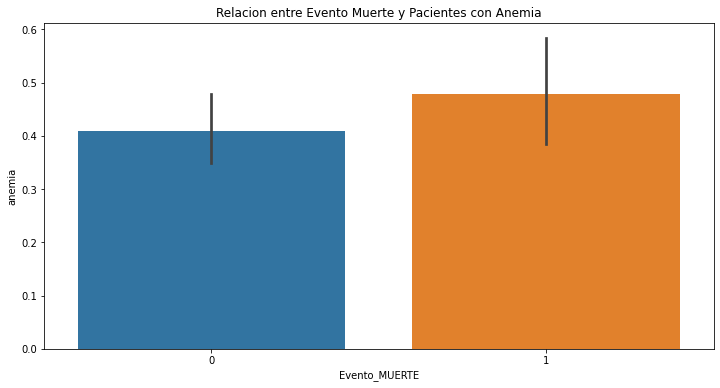

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x, y)
plt.title('Relacion entre Evento Muerte y Pacientes con Anemia')

Como se muestra con el grafico, Hay gran cantidad de pacientes con anemia y terminaron en desceso, y otros sin Anemia que termianron en descenso tambien. 
Por eso se descarta una relacion directa entre la Anemia y el Evento de muerte.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Evento Muerte y Pacientes con Diabetes')

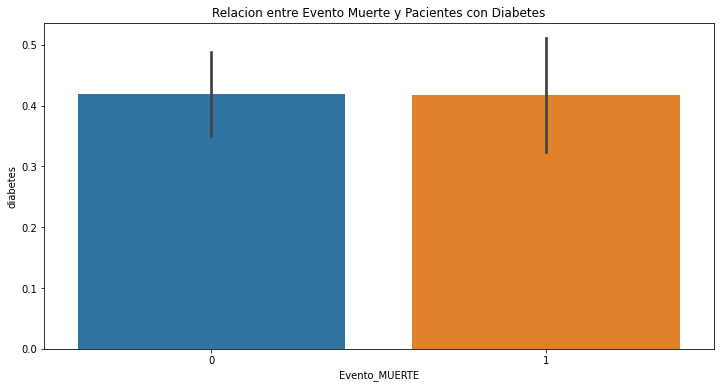

In [10]:
#GRAFICO Nº2 - Relacion entre Pacientes con Diabetes vs Pacientes con eventos de Muerte

x = df.index
y = df.diabetes
y
plt.figure(figsize=(12,6))
sns.barplot(x, y)
plt.title('Relacion entre Evento Muerte y Pacientes con Diabetes')

Como se muestra con el grafico, Hay gran cantidad de pacientes con diabetes y terminaron en desceso, y otros sin Diabetes que terminaron en descenso tambien. 
Por eso se descarta una relacion directa entre la Diabetes y el Evento de muerte.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Evento Muerte y Pacientes Hipertensos')

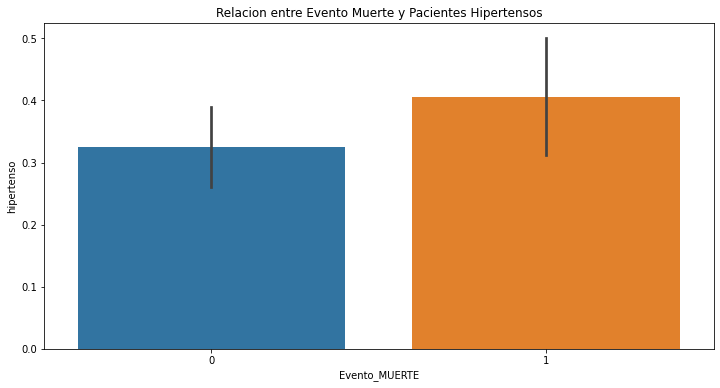

In [11]:
#GRAFICO Nº3 - Relacion entre Pacientes Hipertensos vs Pacientes con eventos de Muerte

x = df.index
y = df.hipertenso
y
plt.figure(figsize=(12,6))
sns.barplot(x, y)
plt.title('Relacion entre Evento Muerte y Pacientes Hipertensos')

Como se muestra con el grafico, Hay gran cantidad de pacientes Hipertensos y terminaron en desceso, y otros sin ser Hipertensos que terminaron en descenso tambien. Si bien hay una leve tendencia a la muerte, cuando es Hipertenso.
Por eso se descarta una relacion directa entre ser Hipertenso y el Evento de muerte. Podria tener una combinacion con otra variable.


In [12]:
# Relacion entre la Fraccion de eyeccion de sangre del corazon con los Eventos d eMuerte

x = df.index
y = df.fraccion_eyeccion
y

Evento_MUERTE
1    20
1    38
1    20
1    20
1    20
     ..
0    38
0    38
0    60
0    38
0    45
Name: fraccion_eyeccion, Length: 299, dtype: int64

Text(0, 0.5, 'Fraccion de Eyeccion de sangre')

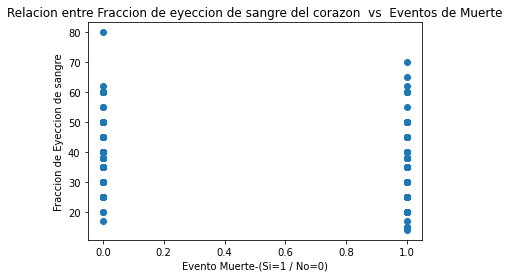

In [13]:
#GRAFICO Nº4- Relacion entre Fraccion de Eyeccion de sangre(%) y Eventos de Muerte
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Relacion entre Fraccion de eyeccion de sangre del corazon  vs  Eventos de Muerte')
ax.set_xlabel('Evento Muerte-(Si=1 / No=0)')
ax.set_ylabel('Fraccion de Eyeccion de sangre')

Haremos otro grafico para clarificar un poco esta relacion, ya que en el grafico anterior no se observa alguna tendencia o no, que nos haga definir una conclusion.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Evento Muerte y Fraccion_eyeccion')

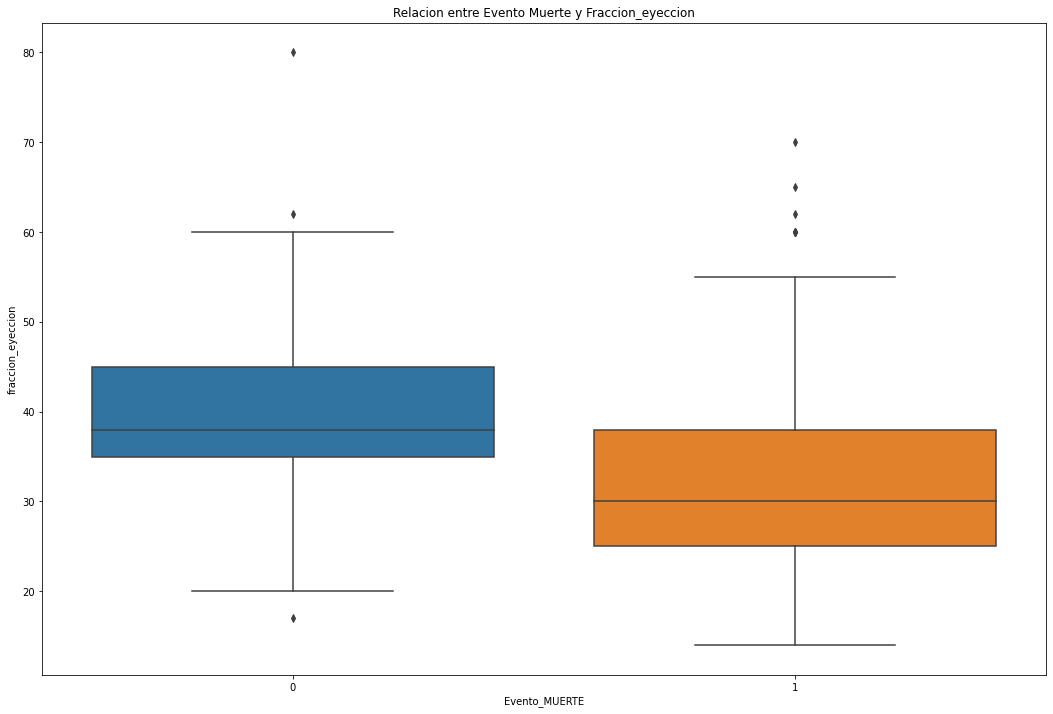

In [14]:
x = df.index
y = df.fraccion_eyeccion
y
plt.figure(figsize=(18,12))
sns.boxplot(x, y)
plt.title('Relacion entre Evento Muerte y Fraccion_eyeccion')

PAra este caso, como la Fraccion de eyeccion normal esta entre 55 - 65%, vemos que tanto para pacientes que fallecieron como los que sobrevivieron, el rango de la Fraccion es amplio para ambos casos (fuera y dentro de la tolerancia).No obstante, en el 2do grafico (boxplot) se puede ver que hay una tendencia que nos marca que para pacientes fallecidos hubo muchos casos con valores por debajo de lo normal (debajo de la tolerancia). Por lo tanto, es una variable a considerar a a Fraccion de eyeccion en sangre.

In [15]:
# RElacion del Valor de Plaquetas en sangre con los Eventos de Muerte

x = df.index
y = df.plaquetas
y

Evento_MUERTE
1    265000.00
1    263358.03
1    162000.00
1    210000.00
1    327000.00
       ...    
0    155000.00
0    270000.00
0    742000.00
0    140000.00
0    395000.00
Name: plaquetas, Length: 299, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Nivel Plaquetas en sangre y Evento Muerte')

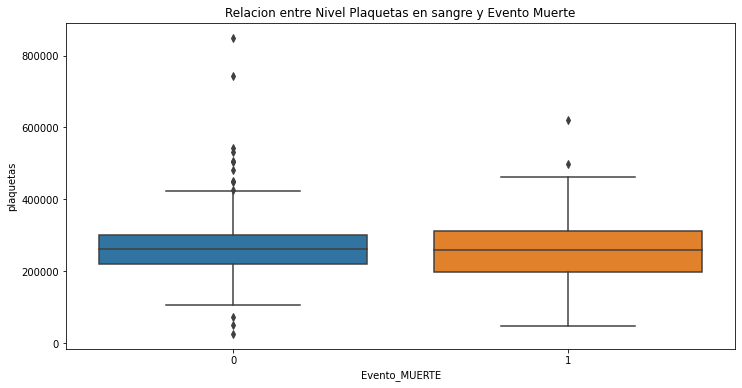

In [16]:
#GRAFICO Nº5 - Relacion entre el Nivel de Plaquetas en sangre y Eventos de Muerte

plt.figure(figsize=(12,6))
sns.boxplot(x, y)
plt.title('Relacion entre Nivel Plaquetas en sangre y Evento Muerte')


En esta grafico se observa que para los casos con desceso, como los que sobrevivieron, el nivel de plaquetas en sangre en su gran mayoria estan dentro del rengo tolerable que ronda los 150.000 - 400.000 mcl.
Tampoco se puede considerar una relacion directa del nivel de plaquetas con el desceso de pacientes.

In [17]:
# Relacion entre el Nivel de CPK y los eventos de muerte

import seaborn as sns
x = df.index
y = df.nivel_CPK
y

Evento_MUERTE
1     582
1    7861
1     146
1     111
1     160
     ... 
0      61
0    1820
0    2060
0    2413
0     196
Name: nivel_CPK, Length: 299, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Nivel CPK y Evento Muerte')

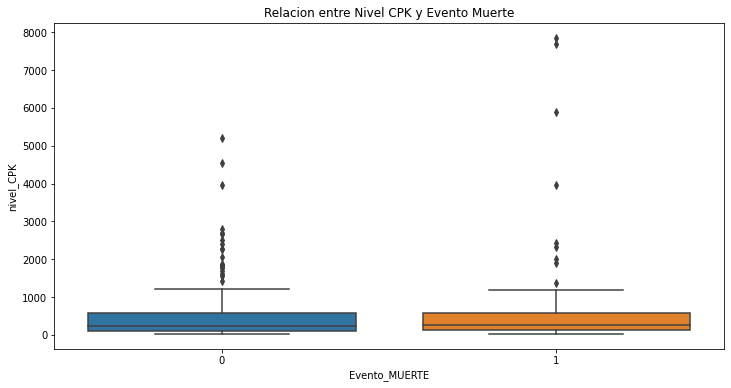

In [18]:
# GRAFICO Nª6  - Distribucion del Nivel de enzima CPK en sangre segun pacientes fallecidos o sobrevivientes
plt.figure(figsize=(12,6))
sns.boxplot(x, y)
plt.title('Relacion entre Nivel CPK y Evento Muerte')

El nivel de CPK tiene valores normales entre 35 – 345 IU/L, tanto para Hombres y Mujeres (incluidos ambos rangos). El grafico muestra a primera instancia un rango muy amplio del resultado de los analisis en los pacientes. Habria que realizar un analisis mas profundo de esta variable para sacar una conclusion.


In [19]:
# Relacion entre Nivel de Sodio en sangre y los eventos de muerte

import seaborn as sns
x = df.index
y = df.nivel_sodio_sangre
y

Evento_MUERTE
1    130
1    136
1    129
1    137
1    116
    ... 
0    143
0    139
0    138
0    140
0    136
Name: nivel_sodio_sangre, Length: 299, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Nivel de Sodio y Evento Muerte')

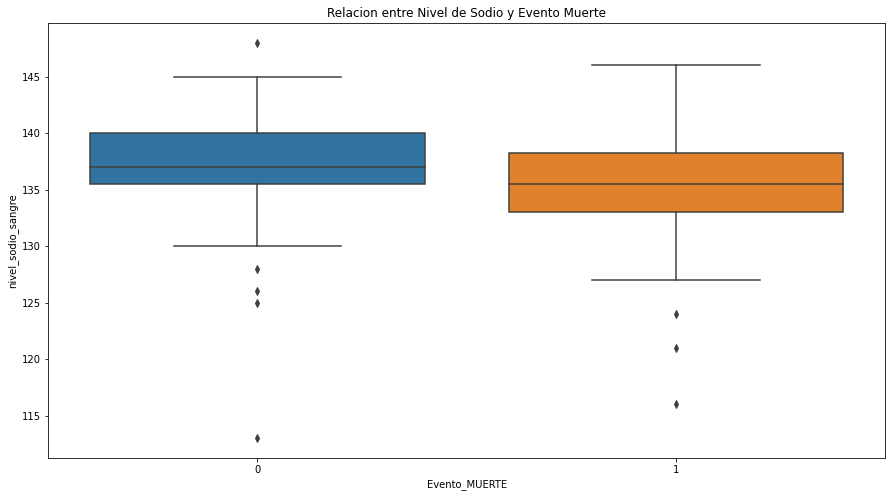

In [20]:
# GRAFICO Nª 7 - Distribucion de Nivel de Sodio segun pacientes fallecidos y sobrevivientes
plt.figure(figsize=(15,8))
sns.boxplot(x, y)
plt.title('Relacion entre Nivel de Sodio y Evento Muerte')

Este grafico muestra que el nivel de sodio no tiene relacion directa con los eventos de muerte, ya que su rango normal esta entre 35 - 145 mEq/L y vemos que hay una distribucion concentrada con pacientes fallecidos y sobrevivientes.
 Aun queda comprobar si se combina con otra variable y es causante de muerte.

In [21]:
# Relacion entre el Nivel de creatinina en sangre y los eventos de muerte

import seaborn as sns
x = df.index
y = df.nivel_creatinina
y

Evento_MUERTE
1    1.9
1    1.1
1    1.3
1    1.9
1    2.7
    ... 
0    1.1
0    1.2
0    0.8
0    1.4
0    1.6
Name: nivel_creatinina, Length: 299, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Nivel Creatinina y Evento Muerte')

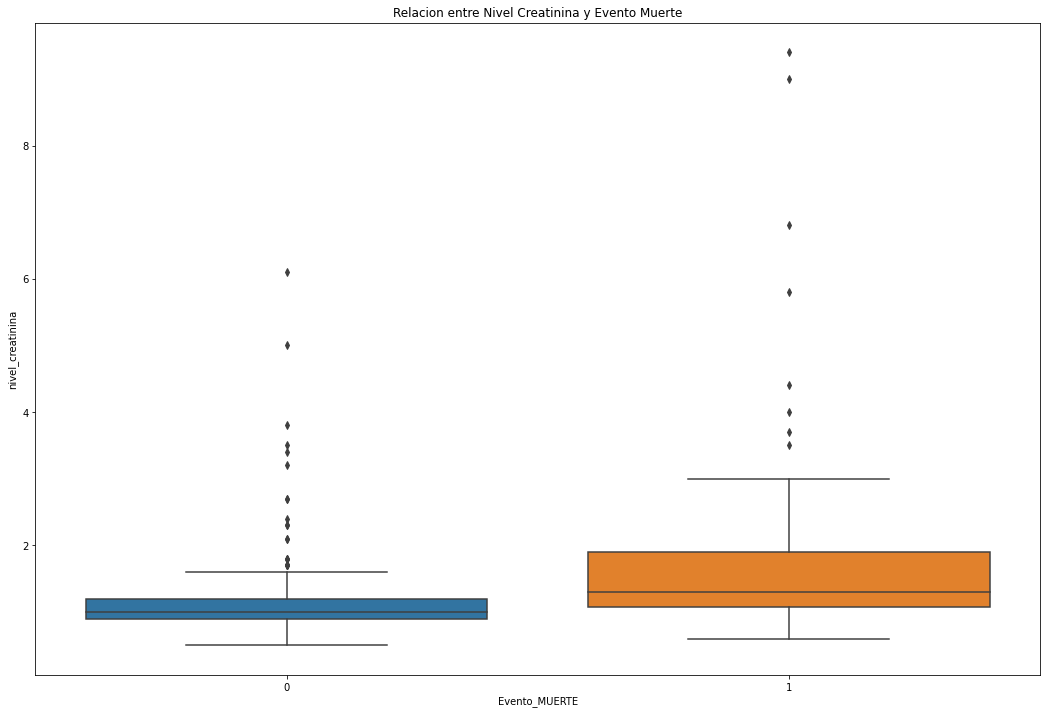

In [22]:
# GRAFICO Nª 8 - Distribucion de Nivel de Creatinina e sangre segun pacientes fallecidos y sobrevivientes
plt.figure(figsize=(18,12))
sns.boxplot(x, y)
plt.title('Relacion entre Nivel Creatinina y Evento Muerte')

En este grafico se observa que hay mas concentracion de datos en personas fallecidas con niveles elevados de Creatinina en sangre (valor normal entre 0,7 - 1,3 mg/dL. Por lo tanto, es una variable a considerar y realizar un analisis mas profundo y aplicar alguna prediccion (segun los temas que veremos mas adelante en el curso, y se puedan aplicar aqui).


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Evento Muerte y Edad')

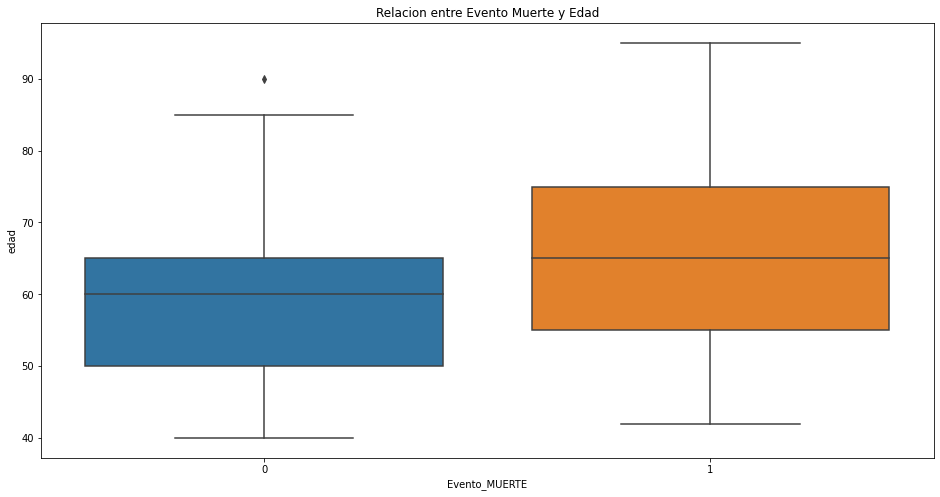

In [23]:
# Grafico 9 - Relacion entre Evento muerte y la Edad
x = df.index
y = df.edad
y
plt.figure(figsize=(16,8))
sns.boxplot(x, y)
plt.title('Relacion entre Evento Muerte y Edad')

Se observa una tendencia a evento muerte cuando es mas grande el paciente. Hay cierta relacion, que se debera comprobar analiticamente mas adelante. Tambien si hay una mayor relacion cuando hay combinacion de variables.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Evento Muerte y Sexo')

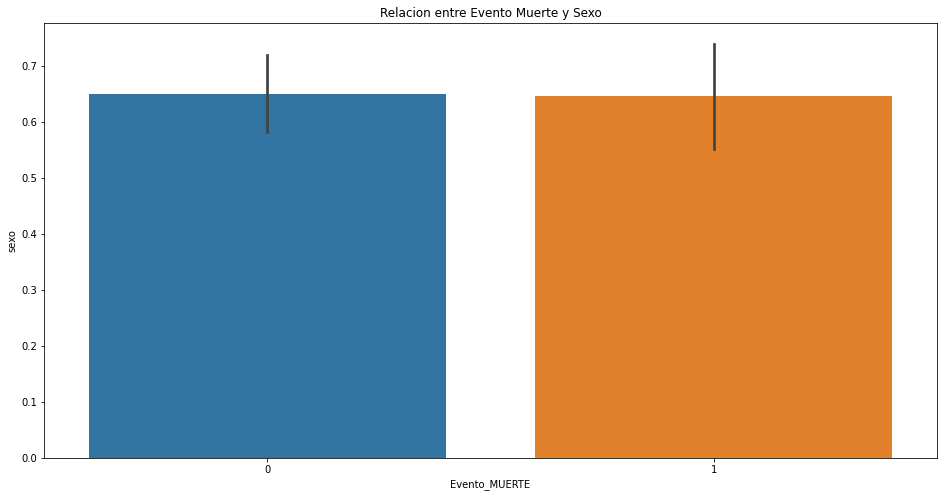

In [24]:
# Grafico 10 - Relacion entre pacientes con evento muerte y Sexo
x = df.index
y = df.sexo
y
plt.figure(figsize=(16,8))
sns.barplot(x, y)
plt.title('Relacion entre Evento Muerte y Sexo')

**Se observa que NO hay relacion directa de un sexo u otro con el evento muerte, por lo tanto no es una variable influyente.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relacion entre Evento Muerte y Fumador')

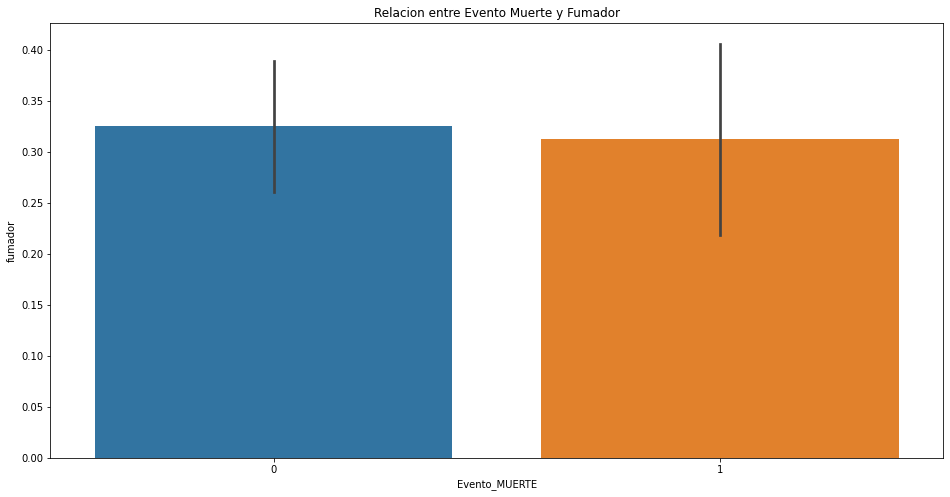

In [25]:
# Grafico 11 - Relacion entre pacientes con evento muerte y fumador
x = df.index
y = df.fumador
y
plt.figure(figsize=(16,8))
sns.barplot(x, y)
plt.title('Relacion entre Evento Muerte y Fumador')

**INSIGHTS**
Otra manera de realizar un analisis y resumen de nuestra base de datos (incluye la Etapa 5 y 6 practicamente), es aplicando la herramienta **"Pandas Profiling"**, la cual se muestra a continuacion:



In [26]:
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  \
Evento_MUERTE                                                         
1              75.0       0        582         0                 20   
1              55.0       0       7861         0                 38   
1              65.0       0        146         0                 20   
1              50.0       1        111         0                 20   
1              65.0       1        160         1                 20   

               hipertenso  plaquetas  nivel_creatinina  nivel_sodio_sangre  \
Evento_MUERTE                                                                
1                       1  265000.00               1.9                 130   
1                       0  263358.03               1.1                 136   
1                       0  162000.00               1.3                 129   
1                       0  210000.00               1.9                 137   
1                       0  327000.00               2.7                 116   

               sexo  fumador  time  
Evento_MUERTE                       
1                 1        0     4  
1                 1        0     6  
1                 1        1     7  
1                 1        0     7  
1                 0        0     8

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Mi resumen')
profile.to_widgets()

/usr/local/lib/python3.8/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot reindex from a duplicate axis')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 6- DATA  WRANGLINNG - Ingenieria de Atributos

**ETAPA 6- DATA WRANGLINNG**
Se realiza un analisis de nuestros datos, respecto a si tiene presencia de datos duplicados, datos nulos, y outliers. Para poder pasar a la etapa siguiente de Seleccion del Algoritmo.

In [27]:
df.isnull() #ahora se busca la cantidad de datos nulos.

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  \
Evento_MUERTE                                                          
1              False   False      False     False              False   
1              False   False      False     False              False   
1              False   False      False     False              False   
1              False   False      False     False              False   
1              False   False      False     False              False   
...              ...     ...        ...       ...                ...   
0              False   False      False     False              False   
0              False   False      False     False              False   
0              False   False      False     False              False   
0              False   False      False     False              False   
0              False   False      False     False              False   

               hipertenso  plaquetas  nivel_creatinina  nivel_sodio_sangre  \
Evento_MUERTE                                                                
1                   False      False             False               False   
1                   False      False             False               False   
1                   False      False             False               False   
1                   False      False             False               False   
1                   False      False             False               False   
...                   ...        ...               ...                 ...   
0                   False      False             False               False   
0                   False      False             False               False   
0                   False      False             False               False   
0                   False      False             False               False   
0                   False      False             False               False   

                sexo  fumador   time  
Evento_MUERTE                         
1              False    False  False  
1              False    False  False  
1              False    False  False  
1              False    False  False  
1              False    False  False  
...              ...      ...    ...  
0              False    False  False  
0              False    False  False  
0              False    False  False  
0              False    False  False  
0              False    False  False  

[299 rows x 12 columns]

Como se observan en talba, NO hay datos nulos. De todas maneras, aplicaremos otro metodo, para mostrarlo de mejor manera visual. Aplicaremos el **"Missingno"**

In [28]:
!pip install missingno #usamos otra forma mas visual y clara para ver si nuestro dataset tiene datos nulos.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


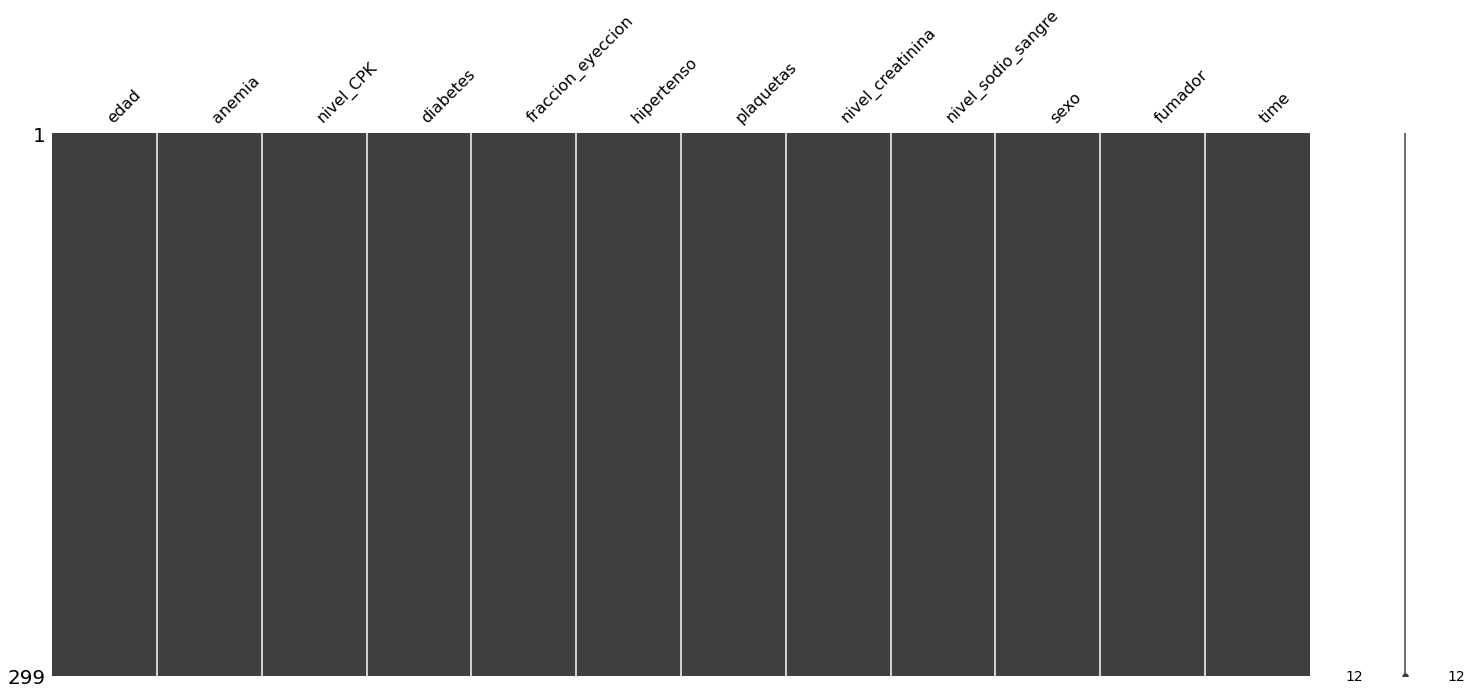

In [29]:
import missingno as msno
msno.matrix(df)

Como se observa, se verifica que no hay datos nulos, y previamente se vio que tampoco hay datos duplicados en nuestro Dataframe. 
**Estamos en condiciones de pasar a la siguiente Etapa de Seleccion de Algoritmo**.

# SELECCION DE VARIABLES (FEATURE SELECTION)

### **METODOS DE FEATURE SELECTION (Seleccion de Variables/factores)**
---



Ahora de este pantallazo general por variable, y para dar un analisis con numeros, se realiza un "Feature Engineering", aplicando el metodo Wrapper, usando el "forward selection". 

In [30]:
df= pd.read_csv('Enfermedad_corazon.csv')
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0  75.0       0        582         0                 20           1   
1  55.0       0       7861         0                 38           0   
2  65.0       0        146         0                 20           0   
3  50.0       1        111         0                 20           0   
4  65.0       1        160         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0  265000.00               1.9                 130     1        0     4   
1  263358.03               1.1                 136     1        0     6   
2  162000.00               1.3                 129     1        1     7   
3  210000.00               1.9                 137     1        0     7   
4  327000.00               2.7                 116     0        0     8   

   Evento_MUERTE  
0              1  
1              1  
2              1  
3              1  
4              1

In [31]:
print(df)

     edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75.0       0        582         0                 20           1   
1    55.0       0       7861         0                 38           0   
2    65.0       0        146         0                 20           0   
3    50.0       1        111         0                 20           0   
4    65.0       1        160         1                 20           0   
..    ...     ...        ...       ...                ...         ...   
294  62.0       0         61         1                 38           1   
295  55.0       0       1820         0                 38           0   
296  45.0       0       2060         1                 60           0   
297  45.0       0       2413         0                 38           0   
298  50.0       0        196         0                 45           0   

     plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0    265000.00               1.9              

In [32]:
X = df.drop("Evento_MUERTE", 1)       # feature matrix
y = df['Evento_MUERTE']               # target feature
df.head()

<ipython-input-32-762a8957fc29>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("Evento_MUERTE", 1)       # feature matrix


edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0  75.0       0        582         0                 20           1   
1  55.0       0       7861         0                 38           0   
2  65.0       0        146         0                 20           0   
3  50.0       1        111         0                 20           0   
4  65.0       1        160         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0  265000.00               1.9                 130     1        0     4   
1  263358.03               1.1                 136     1        0     6   
2  162000.00               1.3                 129     1        1     7   
3  210000.00               1.9                 137     1        0     7   
4  327000.00               2.7                 116     0        0     8   

   Evento_MUERTE  
0              1  
1              1  
2              1  
3              1  
4              1

In [33]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [34]:
forward_selection(data=X,target=y,significance_level=0.01)

<ipython-input-33-a6ce63c591b0>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: Future

['time', 'fraccion_eyeccion', 'nivel_creatinina', 'edad']

Con este metodo "forward selection", obtenemos las variables que mas influyen en el "Evento_MUERTE", que son Fraccion Eyeccion", "Nivel Creatinina", y "Edad"

**OTRO METODO FEATURE SELECTION- SELECCION DE VARIABLES**

COmo para depejar dudas, y ver si se repite el resultado anterior, tambien aplicamos otro metodo de FEature Selection, en este caso con el **Metodo "Stepwise"**

In [35]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [36]:
stepwise_selection(X,y)

<ipython-input-35-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: Future

['time', 'fraccion_eyeccion', 'nivel_creatinina', 'edad']

**Con este metodo obtuvimos las mismas variables mencionadas antes (Fraccion 
Eyeccion, Nivel creatinina, Edad). La variables "times" se descarta porque es un conteo de filas**

# 7- ELECCION DE ALGORITMO

**ELECCION DE ALGORITMO.**
Por el tipo de variables que tenemos en nuestra Dataset, y ser una variable de clasificacion la que tenemos que predecir ("Evento_MUERTE", que es booleano), elegimos un Algoritmo de clasificacion, para evaluar la performance de nuestro modelo aplicado. Usaremos el RAndomForestClassifier y aplicaremos la "Matriz de Confusion".


**Random Forest**

In [37]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [38]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=10)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

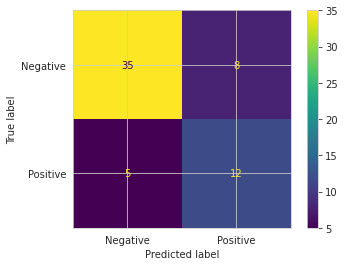

In [39]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

In [40]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([35,  8,  5, 12])

**SE OBSERVAN RESULTADOS MUY ACERTADOS Y ELEVADOS, YA QUE LOS VERDADEROS POSITIVOS Y VERDADEROS NEGATIVOS SON MUY ALTOS (11 Y 45 RESPECTIVAMENTE). POR LO QUE LA PERFORMANCE DEL MODELO ES BUENA.**

In [41]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.7833333333333333

**EXACTITUD del 78,3%** (que seria un 78% de proporción entre los positivos reales predichos por el algoritmo y todos los casos positivos obtenidos de la variable "evento_muerte")

In [42]:
# Se evalua la Precision para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.6, 0.875)

**PRECISION : de los positivos (60%) y de los negativos (87.5%).**



In [43]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.7058823529411765, 0.813953488372093)

**SENSIBILIDAD: 70% de tasa de verdaderos positivos. y 81% la tasa de verdaderos negativos.**

In [44]:
# Tambien podemos aplicar todas las metricas de una sola vez. y nos dara el siguiente resultado.
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.60      0.71      0.65        17

    accuracy                           0.78        60
   macro avg       0.74      0.76      0.75        60
weighted avg       0.80      0.78      0.79        60



Se pone a prueba el modelo y el mismo brinda valores altos, con valores predeterminados pero que se pueden mejorar. **Los valores obtenidos fueron: de Exactitud (78%), Precision (60-87%), y Sensibilidad (70-81%)**. A continuacion se aplicaran mejoras a nuestro algoritmo elegido, con su entrenamiento, evaluacion y validacion respectiva.


# ENTRENAMIENTO y MEJORA DEL ALGORITMO

**CROSS-VALIDATION**: Aplicaremos este metodo para mejorar nuestro algoritmo elegido (RandomForest).

In [55]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
data = df.values
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0  75.0       0        582         0                 20           1   
1  55.0       0       7861         0                 38           0   
2  65.0       0        146         0                 20           0   
3  50.0       1        111         0                 20           0   
4  65.0       1        160         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0  265000.00               1.9                 130     1        0     4   
1  263358.03               1.1                 136     1        0     6   
2  162000.00               1.3                 129     1        1     7   
3  210000.00               1.9                 137     1        0     7   
4  327000.00               2.7                 116     0        0     8   

   Evento_MUERTE  
0              1  
1              1  
2              1  
3              1  
4              1

In [140]:
# Separar en X y y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
dff = X, y

(299, 12) (299,)


In [141]:
# crear el procedimiento loocv 
skf = StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
skf.get_n_splits(X, y)

5

In [142]:
train, test = list(skf.split(X, y))[0]
train

array([  0,   5,   6,   7,   8,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  32,
        33,  35,  36,  37,  38,  39,  40,  41,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  55,  57,  58,  59,  61,  62,  63,
        64,  66,  67,  68,  70,  71,  72,  73,  74,  75,  77,  78,  79,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  93,  94,  95,
        96,  98,  99, 100, 102, 104, 105, 106, 107, 110, 111, 112, 113,
       114, 116, 118, 119, 120, 121, 122, 123, 126, 127, 129, 130, 131,
       132, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 168, 169, 171, 172, 173, 174, 175, 178,
       179, 181, 182, 183, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208,
       209, 210, 211, 212, 213, 214, 216, 217, 219, 221, 222, 22

In [143]:
test

array([  1,   2,   3,   4,   9,  10,  31,  34,  42,  54,  56,  60,  65,
        69,  76,  80,  81,  92,  97, 101, 103, 108, 109, 115, 117, 124,
       125, 128, 133, 134, 153, 154, 167, 170, 176, 177, 180, 184, 185,
       206, 215, 218, 220, 224, 225, 230, 231, 236, 240, 243, 245, 246,
       249, 252, 265, 267, 275, 292, 293, 296])

In [144]:
X[test]

array([[5.5000000e+01, 0.0000000e+00, 7.8610000e+03, 0.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
        1.3600000e+02, 1.0000000e+00, 0.0000000e+00, 6.0000000e+00],
       [6.5000000e+01, 0.0000000e+00, 1.4600000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 1.6200000e+05, 1.3000000e+00,
        1.2900000e+02, 1.0000000e+00, 1.0000000e+00, 7.0000000e+00],
       [5.0000000e+01, 1.0000000e+00, 1.1100000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 2.1000000e+05, 1.9000000e+00,
        1.3700000e+02, 1.0000000e+00, 0.0000000e+00, 7.0000000e+00],
       [6.5000000e+01, 1.0000000e+00, 1.6000000e+02, 1.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 3.2700000e+05, 2.7000000e+00,
        1.1600000e+02, 0.0000000e+00, 0.0000000e+00, 8.0000000e+00],
       [8.0000000e+01, 1.0000000e+00, 1.2300000e+02, 0.0000000e+00,
        3.5000000e+01, 1.0000000e+00, 3.8800000e+05, 9.4000000e+00,
        1.3300000e+02, 1.0000000e+00, 1.0000

In [145]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 0.85
Iteracion:  2  Accuracy: 0.8166666666666667
Iteracion:  3  Accuracy: 0.8666666666666667
Iteracion:  4  Accuracy: 0.8333333333333334
Iteracion:  5  Accuracy: 0.7627118644067796
Accuracy promedio: 0.8258757062146893


**con el CROSS VALIDATION** para el Modelo Random Forest con **valores predeterminados**. Como se ve, sin aplicar el Cross Validation, el Accuracy dio 78%, y despues de aplicar el metodo mencionado,nos dio un 82%.
** A continuacion, aplicaremos varios metodos y tecnicas para mejorar nuestro algoritmo.**

# Optimizacion de Hiperparametros a nuestro Algoritmo

Aplicaremos 3 metodos para optimizar los hiperparametros de nuestro Algoritmo, y mejorar su Accuracy (Grid Search, Randomized search, y Halving grid search)



In [146]:
# OPtmizacion de Hiperparametros
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [148]:
# leo mi ultimo dataset modificado
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0  75.0       0        582         0                 20           1   
1  55.0       0       7861         0                 38           0   
2  65.0       0        146         0                 20           0   
3  50.0       1        111         0                 20           0   
4  65.0       1        160         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0  265000.00               1.9                 130     1        0     4   
1  263358.03               1.1                 136     1        0     6   
2  162000.00               1.3                 129     1        1     7   
3  210000.00               1.9                 137     1        0     7   
4  327000.00               2.7                 116     0        0     8   

   Evento_MUERTE  
0              1  
1              1  
2              1  
3              1  
4              1

In [139]:
df.shape

(299, 13)

In [149]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(209, 12) (90, 12)


In [150]:
# Librerias
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
# predicciones
xgb_y_predict = xgb_model.predict(X_test)

In [151]:
# Accuracy sencillo
xgb_score = accuracy_score(xgb_y_predict, y_test)
print('Accuracy score is:', xgb_score)

Accuracy score is: 0.7444444444444445


In [152]:
from sklearn.metrics import classification_report 
print(classification_report(xgb_y_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80        64
         1.0       0.54      0.77      0.63        26

    accuracy                           0.74        90
   macro avg       0.71      0.75      0.72        90
weighted avg       0.79      0.74      0.75        90



In [159]:
import xgboost
model= xgboost.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5}

In [161]:
# Modelo 1
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 3)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)),3)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 3)}')

Accuracy para Modelo 1 = 0.711
Accuracy para Modelo 2 = 0.711
Accuracy para Modelo 3 = 0.711


**Grid search**

In [162]:
params_grid = {
        'min_child_weight': [1,5],
        'gamma': [0.5, 1],
        'subsample': [0.65, 0.85],
        'colsample_bytree': [0.65, 0.85],
        'max_depth': [2,3],
        'criterion':['entropy','gini']
        }

In [163]:
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=5)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 7)}')

Mejores Parametros {'colsample_bytree': 0.85, 'criterion': 'entropy', 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.85}
Mejor CV score 0.8758420441347271
Accuracy del modelo = 0.7777778


**Randomized search cv**

In [168]:
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 0.65, 'min_child_weight': 1, 'max_depth': 2, 'gamma': 0.5, 'criterion': 'gini', 'colsample_bytree': 0.65}
Mejor score de CV 0.8708074534161491
Accuracy del modelo = 0.77778


**Halving Grid search CV**

In [169]:
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=6)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 3)}')

Mejores parametros {'colsample_bytree': 0.85, 'criterion': 'gini', 'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 0.65}
Mejor Score CV 0.8492753623188406
Accuracy del modelo = 0.778


**A continuacion, aplicaremos varios metodos y técnicas para mejorar nuestro Algoritmo.**

# Ingenieria de Atributos - Creacion, transformacion, borrado de variables.

**FEATURE CREATION - MEJORAMIENTO DEL ALGORITMO.**

**ENCODING**- Trasnformacion de datos.
Para nuestro Dataset, que tiene variables numericas y categoricas, aplicar un metodo de "encoding" no es factible porque las variables categoricas ya estan transformadas a un numero binario 0 o 1, debido a que las variables tienen dos posibilidades, afirmativa o negativa a la condicion clinica que se analiza.


De todas maneras, aplicamos algunos analisis de las variables de nuestro Dataset para aplicar algunas tecnicas aprendidas de clases, viendo el tipo de datos, conteo, etc.
**Ademas tambien se crea una nueva variable RANGO DE EDAD, para aplicar un FEATURE CREATION,   se hace un FEATURE CLEANING (eliminando una variable del dataset) y tambien aplicamos un STANDARD SCALER para algunas variables numericas.**

In [170]:
df= pd.read_csv('Enfermedad_corazon.csv') # Traemos nuevamente nuestro Dataset
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0  75.0       0        582         0                 20           1   
1  55.0       0       7861         0                 38           0   
2  65.0       0        146         0                 20           0   
3  50.0       1        111         0                 20           0   
4  65.0       1        160         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0  265000.00               1.9                 130     1        0     4   
1  263358.03               1.1                 136     1        0     6   
2  162000.00               1.3                 129     1        1     7   
3  210000.00               1.9                 137     1        0     7   
4  327000.00               2.7                 116     0        0     8   

   Evento_MUERTE  
0              1  
1              1  
2              1  
3              1  
4              1

In [171]:
df.dtypes # Vemos que tipo de datos son en cada variable que tenemos y veremos si tenemos datos que son objetos o no

edad                  float64
anemia                  int64
nivel_CPK               int64
diabetes                int64
fraccion_eyeccion       int64
hipertenso              int64
plaquetas             float64
nivel_creatinina      float64
nivel_sodio_sangre      int64
sexo                    int64
fumador                 int64
time                    int64
Evento_MUERTE           int64
dtype: object

In [172]:
df['anemia'].value_counts()

0    170
1    129
Name: anemia, dtype: int64

In [173]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [174]:
df['hipertenso'].value_counts()

0    194
1    105
Name: hipertenso, dtype: int64

In [175]:
df['sexo'].value_counts()

1    194
0    105
Name: sexo, dtype: int64

In [176]:
df['fumador'].value_counts()

0    203
1     96
Name: fumador, dtype: int64

In [177]:
df['Evento_MUERTE'].value_counts()

0    203
1     96
Name: Evento_MUERTE, dtype: int64

In [178]:
pd.crosstab(df.Evento_MUERTE, df.edad)

edad           40.0  41.0  42.0  43.0  44.0  45.0  46.0  47.0  48.0  49.0  \
Evento_MUERTE                                                               
0                 7     1     6     1     2    13     2     1     0     3   
1                 0     0     1     0     0     6     1     0     2     1   

edad           ...  79.0  80.0  81.0  82.0  85.0  86.0  87.0  90.0  94.0  95.0  
Evento_MUERTE  ...                                                              
0              ...     1     2     1     0     3     0     0     1     0     0  
1              ...     0     5     0     3     3     1     1     2     1     2  

[2 rows x 47 columns]

In [179]:
df['edad'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: edad, dtype: int64

Text(0.5, 1.0, 'Distribucion Edad')

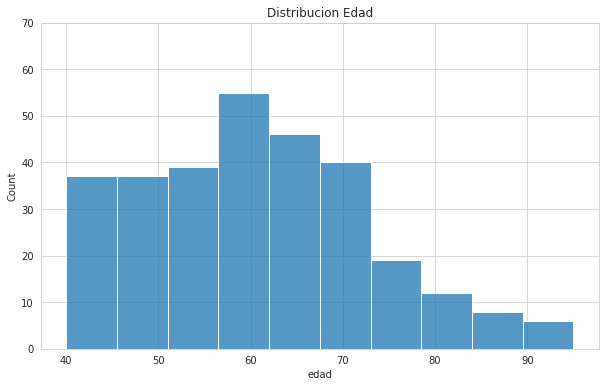

In [180]:
# Verificamos a continuacion la distribucion de la EDAD de los pacientes de nuestro Dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Verificar su distribucion por edad
plt.figure(figsize=(10,6)) 
plt.subplot(111)
sns.histplot(df.edad)
plt.ylim([0,70])
plt.title('Distribucion Edad')

In [181]:
df['edad'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

# FEATURE CREATION y FEATURE CLEANING

**FEATURE CREATION**

In [182]:
# CREAREMOS  UN COLUMNA, llamada "RANGO_EDAD", ya que la distribucion de edad es mucha, haremos 3 grupos, Edad <60, Edad entre 60-80 y Edad >80

df['edad']=df['edad'].astype('int')
df['RANGO_EDAD']=np.where(df.edad >80, 'ancianos',
                        np.where(((df.edad <80) & (df.edad >60)),'jubilados',
                                 'mayores')
                        )
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0        582         0                 20           1   
1    55       0       7861         0                 38           0   
2    65       0        146         0                 20           0   
3    50       1        111         0                 20           0   
4    65       1        160         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  time  \
0  265000.00               1.9                 130     1        0     4   
1  263358.03               1.1                 136     1        0     6   
2  162000.00               1.3                 129     1        1     7   
3  210000.00               1.9                 137     1        0     7   
4  327000.00               2.7                 116     0        0     8   

   Evento_MUERTE RANGO_EDAD  
0              1  jubilados  
1              1    mayores  
2              1  jubilados  
3              1    mayores  
4              1  jubilados

In [183]:
ts=pd.crosstab(df.RANGO_EDAD, df.Evento_MUERTE)
ts.columns=['No','Si']
ts=ts.reset_index()
ts

RANGO_EDAD   No  Si
0   ancianos    5  13
1  jubilados   77  33
2    mayores  121  50

In [184]:
ts1=pd.melt(ts,id_vars=['RANGO_EDAD'],value_vars=['No','Si'])
ts1

RANGO_EDAD variable  value
0   ancianos       No      5
1  jubilados       No     77
2    mayores       No    121
3   ancianos       Si     13
4  jubilados       Si     33
5    mayores       Si     50

In [185]:
G = ts1.groupby(["RANGO_EDAD", "variable"]).sum()
G

value
RANGO_EDAD variable       
ancianos   No            5
           Si           13
jubilados  No           77
           Si           33
mayores    No          121
           Si           50

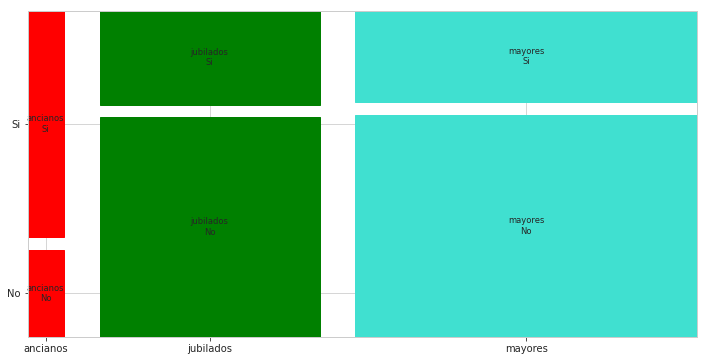

In [186]:
# Vamos a crear el mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(12, 6))
props = lambda key: {'color': 'red' if 'ancianos'in key else ('green' if 'jubilados' in key else 'turquoise')}
mosaic(G["value"],gap=0.06,ax=ax, properties=props)
plt.show()

**EL RANGO DE EDAD ES IMPORTANTE** - Vemos que las personas mayores a 80 años (clasificados como "Ancianos"), tienen mas chance de morir que las personas menores de 60 (clasificadas como "Mayores"). Se muestra claramente en el grafico mosaico, mas alla que es mayor la cantidad de personas analizadas en el grupo de "mayores" y "jubilados".

**FEATURE CLEANING**

Text(0.5, 1.0, 'Distribucion TIME')

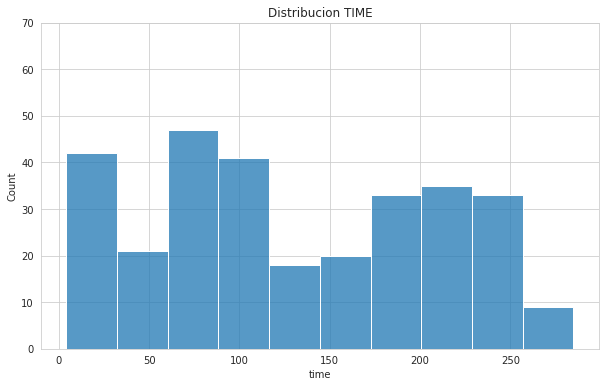

In [187]:
plt.figure(figsize=(10,6)) 
plt.subplot(111)
sns.histplot(df.time)
plt.ylim([0,70])
plt.title('Distribucion TIME')

In [188]:
pd.crosstab(df.Evento_MUERTE, df.time)

time           4    6    7    8    10   11   12   13   14   15   ...  247  \
Evento_MUERTE                                                    ...        
0                0    0    0    0    0    0    1    0    0    0  ...    1   
1                1    1    2    2    6    2    0    1    2    2  ...    0   

time           250  256  257  258  270  271  278  280  285  
Evento_MUERTE                                               
0                7    2    1    2    2    1    1    1    1  
1                0    0    0    0    0    0    0    0    0  

[2 rows x 148 columns]

Esta variable la borraremos por no tener relevancia, ya que significa el numero de muestreo (como un "ID"). Haremos un **"Feature Cleaning"**, y la borramos

In [189]:
df=df.drop(columns=['time'])
df.columns

Index(['edad', 'anemia', 'nivel_CPK', 'diabetes', 'fraccion_eyeccion',
       'hipertenso', 'plaquetas', 'nivel_creatinina', 'nivel_sodio_sangre',
       'sexo', 'fumador', 'Evento_MUERTE', 'RANGO_EDAD'],
      dtype='object')

Despues de aplicar a cada variable categorica un "values count", vemos que los datos estan procesados, **NO hay necesidad de aplicar un LAbel Encoder o One Hot Encoder**" ya que estan las variables con el 0 y el 1. 

**Aplicamos una ESTANDRIZACION DE ESCALAS, con el Metodo "STANDARD SCALER"**: a las variables numericas que tenemos, como son: 

1.   Plaquetas
2.   Nivel Sodio sangre
1.   Nivel CPK
2.   Nivel Creatinina

In [190]:
# Ahora Standard Scaler
from sklearn.preprocessing import PowerTransformer
se= PowerTransformer(method='yeo-johnson')
col_num=['plaquetas','nivel_CPK','nivel_creatinina','nivel_sodio_sangre']
df[col_num]=se.fit_transform(df[col_num])
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0   0.691615         0                 20           1   
1    55       0   2.401701         0                 38           0   
2    65       0  -0.553424         0                 20           0   
3    50       1  -0.833885         0                 20           0   
4    65       1  -0.462335         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  \
0   0.110528          1.212227           -1.468519     1        0   
1   0.093441         -0.087641           -0.244181     1        0   
2  -1.093142          0.381817           -1.642143     1        1   
3  -0.494713          1.212227           -0.006503     1        0   
4   0.720277          1.715066           -3.285073     0        0   

   Evento_MUERTE RANGO_EDAD  
0              1  jubilados  
1              1    mayores  
2              1  jubilados  
3              1    mayores  
4              1  jubilados

(array([ 2.,  4., 39., 49., 42., 40., 70., 26., 20.,  7.]),
 array([-2.67964178, -2.1715075 , -1.66337321, -1.15523892, -0.64710464,
        -0.13897035,  0.36916393,  0.87729822,  1.3854325 ,  1.89356679,
         2.40170108]),
 <a list of 10 Patch objects>)

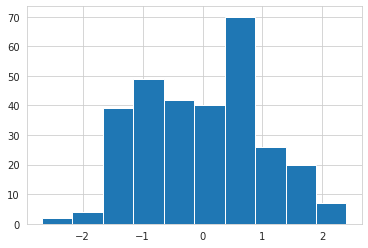

In [191]:
# Grafico solo a modo de ejemplo de como quedaria la distribucion de datos en una de las variables numericas que se aplico el Metodo STANDARD SCALER
import matplotlib.pyplot as plt
plt.hist(df['nivel_CPK'])

**TRATAMIENTO DE NULOS**

1.   Como vimos anteriormente, nuestro Dataset NO tiene nulos, por lo que no podemos aplicar un tratamiento de imputacion, reemplazo, etc de datos nulos.



In [192]:
df.isnull().sum()

edad                  0
anemia                0
nivel_CPK             0
diabetes              0
fraccion_eyeccion     0
hipertenso            0
plaquetas             0
nivel_creatinina      0
nivel_sodio_sangre    0
sexo                  0
fumador               0
Evento_MUERTE         0
RANGO_EDAD            0
dtype: int64

#**1era Ronda de ENTRENAMIENTO DE VARIOS ALGORITMOS DE CLASIFICACION  CON LAS NUEVAS VARIABLES CREADAS**
Como tenemos variables categoricas (evento muerte) que queremos predecir, y hay variables numericoas y categoricas, elegimos el algoritmo del RANDOM FOREST.

1.   Si bien, anteriormente elegimos el metodo RANDOM FOREST, en ese momento lo aplicamos con los valores predeterminados, ahora intentaremos profundizar un poco mas.  Y ademas aplicaremos otros algoritmos de clasificacion.


# a- ALgoritmo RANDOMFOREST

**ALGORITMO CLASIFICACION - RANDOM FOREST**

In [193]:
import numpy as np
from sklearn.model_selection import train_test_split
X=df[['edad','anemia','nivel_CPK','diabetes','fraccion_eyeccion','hipertenso','plaquetas','nivel_creatinina','nivel_sodio_sangre','sexo','fumador','RANGO_EDAD']]
y= df['Evento_MUERTE'].astype('str')

In [194]:
A=X[['edad','anemia','nivel_CPK','diabetes','fraccion_eyeccion','hipertenso','plaquetas','nivel_creatinina','nivel_sodio_sangre','sexo','fumador']] # Numericas
#A= (A-A.mean())/A.std()
B=pd.get_dummies(X[['RANGO_EDAD']]) # Binarias
X_new=pd.concat([A,B],axis=1)
X_new.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0   0.691615         0                 20           1   
1    55       0   2.401701         0                 38           0   
2    65       0  -0.553424         0                 20           0   
3    50       1  -0.833885         0                 20           0   
4    65       1  -0.462335         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  \
0   0.110528          1.212227           -1.468519     1        0   
1   0.093441         -0.087641           -0.244181     1        0   
2  -1.093142          0.381817           -1.642143     1        1   
3  -0.494713          1.212227           -0.006503     1        0   
4   0.720277          1.715066           -3.285073     0        0   

   RANGO_EDAD_ancianos  RANGO_EDAD_jubilados  RANGO_EDAD_mayores  
0                    0                     1                   0  
1                    0                     0                   1  
2                    0                     1                   0  
3                    0                     0                   1  
4                    0                     1                   0

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=15) #Elijo un 30% para entrenamiento y seteo un valor de 15 como semilla

In [196]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
clf = RandomForestClassifier(max_depth=3, random_state=15, n_estimators=199,criterion='gini') # le doy mis variables y elijo profundidad 4, semilla en 15
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=199, random_state=15)

In [197]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        60
           1       0.67      0.33      0.44        30

    accuracy                           0.72        90
   macro avg       0.70      0.62      0.63        90
weighted avg       0.71      0.72      0.69        90



In [199]:
clf.feature_importances_

array([0.11993947, 0.01327839, 0.06799185, 0.0117608 , 0.22449091,
       0.00860554, 0.08399098, 0.30496555, 0.09107401, 0.00546023,
       0.0062311 , 0.04183624, 0.01028141, 0.01009352])

In [200]:
len(clf.feature_importances_)

14

In [201]:
len(X_train.columns)

14

<BarContainer object of 14 artists>

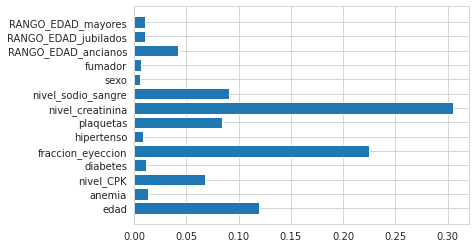

In [202]:
plt.barh(X_train.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

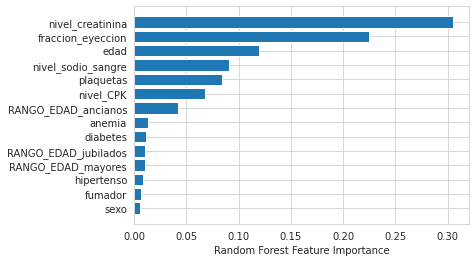

In [203]:
sorted_idx = clf.feature_importances_.argsort()  #Ordenamos el grafico anterior por orden de importancia de las variables mas preponderantes.
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# b- Algoritmo KNN

**OTRO ALGORITMO DE CLASIFICACION - KNN**




In [204]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [205]:
y_test=neigh.predict(X_test)

In [206]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        74
           1       0.53      0.50      0.52        16

    accuracy                           0.83        90
   macro avg       0.71      0.70      0.71        90
weighted avg       0.83      0.83      0.83        90



# c- Algoritmo - REGRESION LOGISTICA

**3er ALGORITMO DE CLASIFICACION - REGRESION LOGISTICA**

In [207]:
y_train

279    0
200    0
283    0
174    0
253    0
      ..
199    0
155    0
156    0
133    0
245    0
Name: Evento_MUERTE, Length: 209, dtype: object

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
clf = LogisticRegression(random_state=15,max_iter=500,\
                         solver='newton-cg').fit(X_train, y_train)

In [210]:
y_test=clf.predict(X_test)

In [211]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        63
           1       1.00      0.56      0.71        27

    accuracy                           0.87        90
   macro avg       0.92      0.78      0.81        90
weighted avg       0.89      0.87      0.85        90



**CONCLUSION**

1.   De los 3 algoritmos aplicados a nuestro DataSet, el que mejor precision, es el algoritmo de REGRESION LOGISTICA, con valores casi del 87% de precision para confirmar o no confirmar un Evento de Muerte en pacientes. Es mas parejo para ambos, ya que en el KNN tiene muy buenos valores para uno y no para otro.. Ademas tiene los valores de F1 score mas altos.



**EXPORTO EL MODELO** 

In [ ]:
# Exportar el modelo
import joblib
import pickle
filename = "RegresionLogistica.joblib"
joblib.dump(clf, filename) # exportarlo

['RegresionLogistica.joblib']

In [ ]:
# Cargar el modelo
filename = "RegresionLogistica.joblib"
loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, y_test)

mejora del 1er entrenamiento

# d- Mejoramiento a nuestro modelo con la 1era Ronda entrenamiento - CROSS VALIDATION

In [212]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [213]:
data = X_new.values
X_new.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0   0.691615         0                 20           1   
1    55       0   2.401701         0                 38           0   
2    65       0  -0.553424         0                 20           0   
3    50       1  -0.833885         0                 20           0   
4    65       1  -0.462335         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  \
0   0.110528          1.212227           -1.468519     1        0   
1   0.093441         -0.087641           -0.244181     1        0   
2  -1.093142          0.381817           -1.642143     1        1   
3  -0.494713          1.212227           -0.006503     1        0   
4   0.720277          1.715066           -3.285073     0        0   

   RANGO_EDAD_ancianos  RANGO_EDAD_jubilados  RANGO_EDAD_mayores  
0                    0                     1                   0  
1                    0                     0                   1  
2                    0                     1                   0  
3                    0                     0                   1  
4                    0                     1                   0

In [214]:
# Separar en X y y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(299, 13) (299,)


In [215]:
# crear el procedimiento  
skf = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
skf.get_n_splits(X, y)

5

In [216]:
train, test = list(skf.split(X, y))[0]
train

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  19,  20,  21,  22,  23,  24,  27,  28,
        29,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        46,  47,  48,  51,  53,  54,  55,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  96,  97,  99, 100, 106, 107, 108, 109, 110, 111,
       112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 128, 129, 130, 132, 133, 134, 136, 139, 140, 141, 142, 143,
       144, 145, 147, 149, 150, 152, 154, 155, 156, 157, 158, 160, 161,
       162, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 179,
       180, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 207, 208, 209,
       210, 211, 212, 213, 216, 217, 218, 219, 220, 221, 222, 22

In [217]:
test

array([ 18,  25,  26,  30,  43,  44,  45,  49,  50,  52,  56,  68,  79,
        85,  95,  98, 101, 102, 103, 104, 105, 114, 127, 131, 135, 137,
       138, 146, 148, 151, 153, 159, 163, 170, 176, 177, 178, 181, 183,
       202, 206, 214, 215, 226, 240, 242, 243, 244, 246, 248, 252, 255,
       256, 257, 259, 262, 274, 288, 294, 297])

In [218]:
X[test]

array([[ 7.00000000e+01,  1.00000000e+00, -7.10884210e-01,
         0.00000000e+00,  2.50000000e+01,  1.00000000e+00,
        -1.88648866e-01, -3.83444452e-01,  7.71582186e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 8.00000000e+01,  0.00000000e+00, -5.39807568e-01,
         1.00000000e+00,  3.80000000e+01,  0.00000000e+00,
        -1.27034390e+00,  1.21222739e+00,  1.97612119e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.50000000e+01,  1.00000000e+00, -8.24520022e-01,
         0.00000000e+00,  4.00000000e+01,  1.00000000e+00,
        -6.61323596e-01, -3.83444452e-01,  2.41755550e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 9.40000000e+01,  0.00000000e+00,  6.91614661e-01,
         1.00000000e+00,  3.80000000e+01,  1.00000000e+00,
         9.34412732e-02,  1.14426007e+00, -6.89300849e-01,
         1.00000000e+00,  0.00000000e

In [219]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier(random_state=1,n_estimators=20, criterion="gini",max_depth=3)
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 1.0
Iteracion:  2  Accuracy: 0.9833333333333333
Iteracion:  3  Accuracy: 1.0
Iteracion:  4  Accuracy: 1.0
Iteracion:  5  Accuracy: 0.9830508474576272
Accuracy promedio: 0.9932768361581921


**-CONCLUSION del 1er ENTRENAMIENTO**: con las nuevas variables de Edad (rango de edad dividido en 3), y entrenando nuestro algoritmo y mejorandolo con el Cross Validation, **se obtiene un valor del 99% de Precision**. VAlor muy alto, cercano al 100%, lo que no esta indicando que nuestro moldeo esta cayendo en un **Over-fitting.**, algo no deseado para nosotros.

Aun asi, para seguir aplicando las tecnicas aprendidas en clases, volveremos a realizar un 2da ronda de entrenamiento y aplicaremos el Cross Validation nuevamente.

# 2da RONDA DE ENTRENAMIENTO - ALGORITMOS de Clasificacion y agregados de Variables.

**AGREGADOS de FEATURE ENGINEERING y 2da Ronda de Entrenamiento nuevamente del Algoritmo**

In [220]:
# Asi como creamos una variable nueva de RANGO DE EDAD, evaluaremos los datos de la Variable Fraccion-Eyeccion, que es una de las variable s influyentes, segun nuestras mediciones.
pd.crosstab(df.Evento_MUERTE, df.fraccion_eyeccion)

fraccion_eyeccion  14  15  17  20  25  30  35  38  40  45  50  55  60  62  65  \
Evento_MUERTE                                                                   
0                   0   0   1   2  18  21  42  25  33  15  15   2  27   1   0   
1                   1   2   1  16  18  13   7  15   4   5   6   1   4   1   1   

fraccion_eyeccion  70  80  
Evento_MUERTE              
0                   0   1  
1                   1   0

In [221]:
df['fraccion_eyeccion'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70])

In [222]:

df['fraccion_eyeccion']=df['fraccion_eyeccion'].astype('int')
df['RANGO_Fraccion_Eyeccion']=np.where(df.fraccion_eyeccion >55, 'Sin_disfuncion',
                        np.where(((df.fraccion_eyeccion <55) & (df.fraccion_eyeccion >45)),'Disfuncion_leve',
                                  np.where(((df.fraccion_eyeccion <45) & (df.fraccion_eyeccion >29)),'Disfuncion_media',
                                 'Disfuncion_GRAVE'))
                        )
df.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0   0.691615         0                 20           1   
1    55       0   2.401701         0                 38           0   
2    65       0  -0.553424         0                 20           0   
3    50       1  -0.833885         0                 20           0   
4    65       1  -0.462335         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  \
0   0.110528          1.212227           -1.468519     1        0   
1   0.093441         -0.087641           -0.244181     1        0   
2  -1.093142          0.381817           -1.642143     1        1   
3  -0.494713          1.212227           -0.006503     1        0   
4   0.720277          1.715066           -3.285073     0        0   

   Evento_MUERTE RANGO_EDAD RANGO_Fraccion_Eyeccion  
0              1  jubilados        Disfuncion_GRAVE  
1              1    mayores        Disfuncion_media  
2              1  jubilados        Disfuncion_GRAVE  
3              1    mayores        Disfuncion_GRAVE  
4              1  jubilados        Disfuncion_GRAVE

In [223]:
ts1=pd.crosstab(df.RANGO_Fraccion_Eyeccion, df.Evento_MUERTE)
ts1.columns=['No','Si']
ts1=ts1.reset_index()
ts1

RANGO_Fraccion_Eyeccion   No  Si
0        Disfuncion_GRAVE   38  44
1         Disfuncion_leve   15   6
2        Disfuncion_media  121  39
3          Sin_disfuncion   29   7

In [224]:
ts2=pd.melt(ts1,id_vars=['RANGO_Fraccion_Eyeccion'],value_vars=['No','Si'])
ts2

RANGO_Fraccion_Eyeccion variable  value
0        Disfuncion_GRAVE       No     38
1         Disfuncion_leve       No     15
2        Disfuncion_media       No    121
3          Sin_disfuncion       No     29
4        Disfuncion_GRAVE       Si     44
5         Disfuncion_leve       Si      6
6        Disfuncion_media       Si     39
7          Sin_disfuncion       Si      7

In [225]:
G1 = ts2.groupby(["RANGO_Fraccion_Eyeccion", "variable"]).sum()
G1

value
RANGO_Fraccion_Eyeccion variable       
Disfuncion_GRAVE        No           38
                        Si           44
Disfuncion_leve         No           15
                        Si            6
Disfuncion_media        No          121
                        Si           39
Sin_disfuncion          No           29
                        Si            7

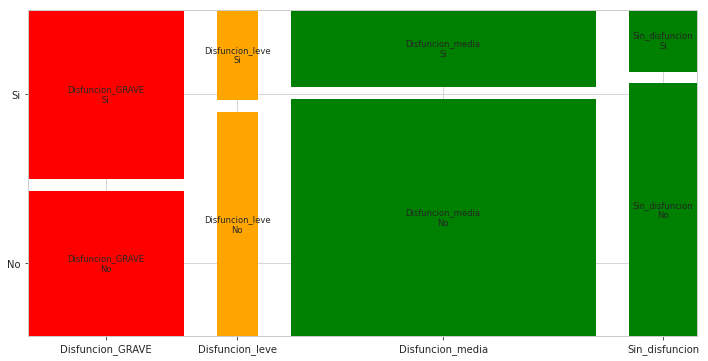

In [226]:
# Realizamos un mosaic plot para nuestra variable creada
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(12, 6))
props = lambda key: {'color': 'red' if 'Disfuncion_GRAVE'in key else ('orange' if 'Disfuncion_leve' in key else ('turquoise' if 'Disfuncion_leve' in key else 'green'))}
mosaic(G1["value"],gap=0.06,ax=ax, properties=props)
plt.show()

**VARIABLE NUEVA- RANGO de Fraccion de Eyeccion**//
Se observa en el grafico que en los valores normales de Fraccion de Eyeccion, que son **> a 55% y en valores cercanos a ese valor, clasificados como "Disfuncion leve" (entre 45%-55%), es mayor la cantidad que sobrevive**, mientras que cuando es "Disfuncion media" la probabilidad de muerte aumenta, y si el paciente tiene **"Disfuncion GRAVE" (<30%), la posibilidad de muerte es ALTA**.

# A - Algoritmo Random Forest.

Aplicamos de vuelta los 3 algoritmos de Clasificacion vistos antes: 
 
*   **ALGORITMO DE CLASIFICACION - RANDOM FOREST**

In [227]:
import numpy as np
from sklearn.model_selection import train_test_split
X=df[['edad','anemia','nivel_CPK','diabetes','fraccion_eyeccion','hipertenso','plaquetas','nivel_creatinina','nivel_sodio_sangre','sexo','fumador','RANGO_EDAD','RANGO_Fraccion_Eyeccion']]
y= df['Evento_MUERTE'].astype('str')

In [228]:
# Aplico un ENCODING a mi nueva variable categorica, la variable RANGO Fraccion Eyeccion y uno todo en un solo Dataframe

A=X[['edad','anemia','nivel_CPK','diabetes','fraccion_eyeccion','hipertenso','plaquetas','nivel_creatinina','nivel_sodio_sangre','sexo','fumador']] # Numericas
#A= (A-A.mean())/A.std()
B=pd.get_dummies(X[['RANGO_EDAD','RANGO_Fraccion_Eyeccion']]) # Binarias
X_new=pd.concat([A,B],axis=1)
X_new.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0   0.691615         0                 20           1   
1    55       0   2.401701         0                 38           0   
2    65       0  -0.553424         0                 20           0   
3    50       1  -0.833885         0                 20           0   
4    65       1  -0.462335         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  \
0   0.110528          1.212227           -1.468519     1        0   
1   0.093441         -0.087641           -0.244181     1        0   
2  -1.093142          0.381817           -1.642143     1        1   
3  -0.494713          1.212227           -0.006503     1        0   
4   0.720277          1.715066           -3.285073     0        0   

   RANGO_EDAD_ancianos  RANGO_EDAD_jubilados  RANGO_EDAD_mayores  \
0                    0                     1                   0   
1                    0                     0                   1   
2                    0                     1                   0   
3                    0                     0                   1   
4                    0                     1                   0   

   RANGO_Fraccion_Eyeccion_Disfuncion_GRAVE  \
0                                         1   
1                                         0   
2                                         1   
3                                         1   
4                                         1   

   RANGO_Fraccion_Eyeccion_Disfuncion_leve  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   RANGO_Fraccion_Eyeccion_Disfuncion_media  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   RANGO_Fraccion_Eyeccion_Sin_disfuncion  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.35, random_state=15) #Elijo un 35% para entrenamiento y steo un valor de 15 como semilla

In [230]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
clf = RandomForestClassifier(max_depth=4, random_state=18, n_estimators=100,criterion='gini') # le doy mis variables y elijo profundidad 3, semilla en 18
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=18)

In [231]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        72
           1       0.62      0.45      0.53        33

    accuracy                           0.74       105
   macro avg       0.70      0.66      0.67       105
weighted avg       0.73      0.74      0.73       105



In [233]:
clf.feature_importances_

array([0.10704919, 0.01040732, 0.0829612 , 0.01039156, 0.19665739,
       0.00726676, 0.07179225, 0.28853297, 0.06511671, 0.01099855,
       0.00527374, 0.03291458, 0.00951804, 0.00706574, 0.06839323,
       0.00844751, 0.00766428, 0.00954896])

In [234]:
len(clf.feature_importances_)

18

In [235]:
len(X_train.columns)

18

Text(0.5, 0, 'Random Forest Feature Importance')

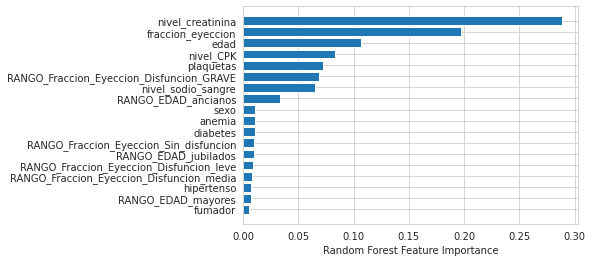

In [236]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# B - Algoritmo KNN

**2do ALGORITMO DE CLASIFICACION - KNN**

In [237]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [238]:
y_test=neigh.predict(X_test)

In [239]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        83
           1       0.58      0.64      0.61        22

    accuracy                           0.83       105
   macro avg       0.74      0.76      0.75       105
weighted avg       0.83      0.83      0.83       105



# C - Algoritmo REGRESION LOGISTICA.

**ALGORITMO DE CLASIFICACION - REGRESION LOGISTICA**

In [240]:
y_train

267    0
93     1
261    0
176    0
144    1
      ..
199    0
155    0
156    0
133    0
245    0
Name: Evento_MUERTE, Length: 194, dtype: object

In [241]:
from sklearn.linear_model import LogisticRegression

In [242]:
clf = LogisticRegression(random_state=15,max_iter=500,\
                         solver='newton-cg').fit(X_train, y_train)

In [243]:
y_test=clf.predict(X_test)

In [244]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        75
           1       0.88      0.70      0.78        30

    accuracy                           0.89       105
   macro avg       0.88      0.83      0.85       105
weighted avg       0.88      0.89      0.88       105



**CONCLUSION 2da ronda entrenamiento.** Con esta 2da ronda y agregado de una nueva variable (Rango de Fraccion de eyeccion de sangre), se lograron valores mas altos en los 3 algoritmos, siendo nuevamente el Algoritmo de REgresion Logistica el mas alto en PRecision. **En este caso, la Regresion Logistica alcanzo un valor del 89% de Precision, SIN aplicar una mejora al algoritmo.**

# D - Mejoramiento a nuestro modelo con la 2da Ronda entrenamiento - CROSS VALIDATION

**MEJORA DE NUESTRO MODELO MACHINE LEAARNING - CROSS VALIDATION** 

1.   Para mejorar nuestro modelo de Machine learning, aplicaremos el metodo llamado **"Stratified K-Fold Cross Validation"** .  Elegimos el Algoritmo que mejores resutlados nos dio, de los 3 aplicados (RandomForest, KNN, REgresion Logistica). en este caso, el elegido es el Algoritmo de REgresion Logistica.



In [245]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [246]:
data = X_new.values
X_new.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0   0.691615         0                 20           1   
1    55       0   2.401701         0                 38           0   
2    65       0  -0.553424         0                 20           0   
3    50       1  -0.833885         0                 20           0   
4    65       1  -0.462335         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  \
0   0.110528          1.212227           -1.468519     1        0   
1   0.093441         -0.087641           -0.244181     1        0   
2  -1.093142          0.381817           -1.642143     1        1   
3  -0.494713          1.212227           -0.006503     1        0   
4   0.720277          1.715066           -3.285073     0        0   

   RANGO_EDAD_ancianos  RANGO_EDAD_jubilados  RANGO_EDAD_mayores  \
0                    0                     1                   0   
1                    0                     0                   1   
2                    0                     1                   0   
3                    0                     0                   1   
4                    0                     1                   0   

   RANGO_Fraccion_Eyeccion_Disfuncion_GRAVE  \
0                                         1   
1                                         0   
2                                         1   
3                                         1   
4                                         1   

   RANGO_Fraccion_Eyeccion_Disfuncion_leve  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   RANGO_Fraccion_Eyeccion_Disfuncion_media  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   RANGO_Fraccion_Eyeccion_Sin_disfuncion  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0

In [247]:
# Separar en X y y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(299, 17) (299,)


In [248]:
# crear el procedimiento  
skf = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
skf.get_n_splits(X, y)

5

In [249]:
train, test = list(skf.split(X, y))[0]
train

array([  0,   1,   2,   4,   5,   6,   8,   9,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  27,  28,  29,
        30,  31,  34,  35,  36,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  50,  51,  52,  54,  55,  57,  58,  59,  60,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  77,  78,
        80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,
        95,  96,  99, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       143, 144, 146, 147, 149, 150, 151, 152, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       174, 175, 176, 177, 178, 179, 181, 184, 185, 186, 187, 191, 192,
       193, 194, 196, 197, 198, 200, 201, 202, 203, 204, 206, 208, 209,
       210, 212, 213, 214, 215, 217, 218, 219, 221, 222, 223, 22

In [250]:
test

array([  3,   7,  10,  25,  32,  33,  37,  38,  49,  53,  56,  61,  72,
        76,  79,  83,  93,  97,  98, 100, 101, 103, 116, 121, 127, 142,
       145, 148, 153, 163, 173, 180, 182, 183, 188, 189, 190, 195, 199,
       205, 207, 211, 216, 220, 224, 227, 230, 249, 250, 251, 253, 259,
       266, 275, 284, 288, 290, 292, 296, 297])

In [251]:
X[test]

array([[50.        ,  1.        , -0.8338852 , ...,  1.        ,
         0.        ,  0.        ],
       [60.        ,  1.        ,  0.17243674, ...,  0.        ,
         0.        ,  0.        ],
       [75.        ,  1.        , -1.17108466, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [52.        ,  0.        , -0.29484706, ...,  0.        ,
         0.        ,  1.        ],
       [45.        ,  0.        ,  1.61188585, ...,  0.        ,
         0.        ,  0.        ],
       [45.        ,  0.        ,  1.7143496 , ...,  0.        ,
         0.        ,  1.        ]])

In [252]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier(random_state=1,n_estimators=20, criterion="gini",max_depth=3)
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 1.0
Iteracion:  2  Accuracy: 1.0
Iteracion:  3  Accuracy: 1.0
Iteracion:  4  Accuracy: 1.0
Iteracion:  5  Accuracy: 1.0
Accuracy promedio: 1.0


**CONCLUSION**: Con la m2da ronda de entrenamiento de nuestro modelo, y aplicando un Crossw Validation, se alcanza un 100% de PRecision, lo cual nos muestra que tenemos un **OVER-FITTING**, siendo no deseable para predicciones. 

# Optimizacion de Hyperparametros de Algoritmos

In [253]:
# OPtmizacion de Hiperparametros
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [254]:
# leo mi ultimo dataset modificado, con las variables nuevas creadas ya transformadas en 0 o 1 (por ser variables categoricas)
X_new.head()

edad  anemia  nivel_CPK  diabetes  fraccion_eyeccion  hipertenso  \
0    75       0   0.691615         0                 20           1   
1    55       0   2.401701         0                 38           0   
2    65       0  -0.553424         0                 20           0   
3    50       1  -0.833885         0                 20           0   
4    65       1  -0.462335         1                 20           0   

   plaquetas  nivel_creatinina  nivel_sodio_sangre  sexo  fumador  \
0   0.110528          1.212227           -1.468519     1        0   
1   0.093441         -0.087641           -0.244181     1        0   
2  -1.093142          0.381817           -1.642143     1        1   
3  -0.494713          1.212227           -0.006503     1        0   
4   0.720277          1.715066           -3.285073     0        0   

   RANGO_EDAD_ancianos  RANGO_EDAD_jubilados  RANGO_EDAD_mayores  \
0                    0                     1                   0   
1                    0                     0                   1   
2                    0                     1                   0   
3                    0                     0                   1   
4                    0                     1                   0   

   RANGO_Fraccion_Eyeccion_Disfuncion_GRAVE  \
0                                         1   
1                                         0   
2                                         1   
3                                         1   
4                                         1   

   RANGO_Fraccion_Eyeccion_Disfuncion_leve  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   RANGO_Fraccion_Eyeccion_Disfuncion_media  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   RANGO_Fraccion_Eyeccion_Sin_disfuncion  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0

In [255]:
X_new.shape

(299, 18)

In [256]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(209, 17) (90, 17)


In [257]:
# Librerias (!! tiempo de ejecucion = min)
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
# predicciones
xgb_y_predict = xgb_model.predict(X_test)

In [258]:
# Accuracy sencillo
xgb_score = accuracy_score(xgb_y_predict, y_test)
print('Accuracy score is:', xgb_score)

Accuracy score is: 1.0


In [259]:
from sklearn.metrics import classification_report 
print(classification_report(xgb_y_predict,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



**Seleccion MANUAL**

In [261]:
model= xgboost.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3}

In [262]:
# Modelo 1
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 3)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 3)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 3)}')

Accuracy para Modelo 1 = 1.0
Accuracy para Modelo 2 = 1.0
Accuracy para Modelo 3 = 1.0


**GRID Search**

In [263]:
params_grid = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3,4],
        'criterion':['entropy','gini']
        }

In [264]:
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 3)}')

Mejores Parametros {'colsample_bytree': 0.6, 'criterion': 'entropy', 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}
Mejor CV score 1.0
Accuracy del modelo = 1.0


**RAndomized Search CV**

In [265]:
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 3)}')

Mejores parametros {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1, 'criterion': 'gini', 'colsample_bytree': 0.6}
Mejor score de CV 1.0
Accuracy del modelo = 1.0


# CONCLUSION FINAL

**CONCLUSION FINAL**

*   Con la creacion de nuevas variables (rango de edad dividio en 3 rangos, y Fraccion de Eyeccion dividido en 4) aplicamos los ALgoritmos de CLasificacion (RandomForest, KNN y Regresion Logistica), **siendo la Regresion Logistica la que nos brindo un 89% de precision**, sin aplicar tecnicas de mejora al algoritmo.  

*   Cuando se aplico una tecnica de mejora (Cross Validation) a ese modelo, la PRECISION llego al 100% , indicando un **OVER-FITTING** de nuestro modelo, lo cual NO nos sirve para predecir, ya que tuvo un aprendizaje excesivo el modelo, teniendo imposibilidad de predecir valores nuevos. 

* **Como las variables mas importantes seguien siendo las 3 del inicio (Nivel de creatinina, fraccion de eyeccion y edad), volvimos al Dataset original, y luego de aplicar el Cross Validation, llegamos a un 82,5%.** Valor aceptable para tomar en consideracion y predecir eventos de muerte en clinicas y centros de salud. **Por supuesto que se necesitan mas cantidad de datos, para mejorar aun mas estos valores.**



